# 세종대학교 인공지능 텀프로젝트 - 휴학과 자퇴사이
## Sejong Univ. AI Term Proejct - SejongBHAJ
## Situation Classifier

---

### Object Detection with Tensorflow API (ODTA)

### 반드시 일괄실행하지 말고 한 단계씩 실행해 주세요.


In [0]:
#Object_detection_with_Tensorflow_API_at_colab_SejongBHAJ

In [1]:
import os
from google.colab import drive
if not os.path.exists('/content/gdrive'):
  drive.mount('/content/gdrive')
  print('mounted')
else:
  print('already mounted')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
mounted


In [0]:
!cp -r gdrive/'My Drive'/ai_project/TFRecords-export/train 

total 14K
-rw------- 1 root root 1.2K Jun 23 09:23 label_map.pbtxt
drwx------ 2 root root 4.0K Jun 15 18:27 TFRecords-export_San-hee
drwx------ 2 root root 4.0K Jun 15 15:37 TFRecords-export_Yeong-Seo
drwx------ 2 root root 4.0K Jun 15 15:52 TFRecords-export_Yong-Ho


In [0]:
#!ls -al gdrive/'My Drive'/ai_project/TFRecords-export/train/

In [0]:
#!ls -al gdrive/'My Drive'/ai_project/TFRecords-export/train/TFRecords-export_San-hee
#!ls -al gdrive/'My Drive'/ai_project/TFRecords-export/train/TFRecords-export_Yeong-Seo
#!ls -al gdrive/'My Drive'/ai_project/TFRecords-export/train/TFRecords-export_Yong-Ho

In [0]:
repo_url = 'https://github.com/Tony607/object_detection_demo'

num_steps = 1000
num_eval_steps = 50

MODELS_CONFIG = {
    'ssd_mobilenet_v2': {
        'model_name': 'ssd_mobilenet_v2_coco_2018_03_29',
        'pipeline_file': 'ssd_mobilenet_v2_coco.config',
        'batch_size': 12
    },
    'faster_rcnn_inception_v2': {
        'model_name': 'faster_rcnn_inception_v2_coco_2018_01_28',
        'pipeline_file': 'faster_rcnn_inception_v2_pets.config',
        'batch_size': 12
    },
    'rfcn_resnet101': {
        'model_name': 'rfcn_resnet101_coco_2018_01_28',
        'pipeline_file': 'rfcn_resnet101_pets.config',
        'batch_size': 8
    },
    
    'faster_rcnn_inception_resnet_v2_atrous': {
        'model_name': 'faster_rcnn_inception_resnet_v2_atrous_coco_2018_01_28',
        'pipeline_file': 'faster_rcnn_inception_resnet_v2_atrous_coco.config',
        'batch_size': 8
    },
    
    'ssd_resnet50_v1': {
        'model_name': 'ssd_resnet50_v1_fpn_shared_box_predictor_640x640_coco14_sync_2018_07_03',
        'pipeline_file': 'ssd_resnet50_v1_fpn_shared_box_predictor_640x640_coco14_sync.config',
        'batch_size': 8
    }
}



selected_model = 'ssd_mobilenet_v2'
    
MODEL = MODELS_CONFIG[selected_model]['model_name']
pipeline_file = MODELS_CONFIG[selected_model]['pipeline_file']    
batch_size = MODELS_CONFIG[selected_model]['batch_size']    

In [3]:
import os
%cd /content
!git clone --quiet https://github.com/tensorflow/models.git
!apt-get install -qq protobuf-compiler python-pil python-lxml python-tk

!pip install -q Cython contextlib2 pillow lxml matplotlib
!pip install -q pycocotools

%cd /content/models/research
!protoc object_detection/protos/*.proto --python_out=.

os.environ['PYTHONPATH'] += ':/content/models/research/:/content/models/research/slim/'
!python object_detection/builders/model_builder_test.py

/content
Selecting previously unselected package python-bs4.
(Reading database ... 130942 files and directories currently installed.)
Preparing to unpack .../0-python-bs4_4.6.0-1_all.deb ...
Unpacking python-bs4 (4.6.0-1) ...
Selecting previously unselected package python-pkg-resources.
Preparing to unpack .../1-python-pkg-resources_39.0.1-2_all.deb ...
Unpacking python-pkg-resources (39.0.1-2) ...
Selecting previously unselected package python-chardet.
Preparing to unpack .../2-python-chardet_3.0.4-1_all.deb ...
Unpacking python-chardet (3.0.4-1) ...
Selecting previously unselected package python-six.
Preparing to unpack .../3-python-six_1.11.0-2_all.deb ...
Unpacking python-six (1.11.0-2) ...
Selecting previously unselected package python-webencodings.
Preparing to unpack .../4-python-webencodings_0.5-2_all.deb ...
Unpacking python-webencodings (0.5-2) ...
Selecting previously unselected package python-html5lib.
Preparing to unpack .../5-python-html5lib_0.999999999-1_all.deb ...
Unpa

In [4]:
%cd /content
repo_dir_path = os.path.abspath(os.path.join('.', os.path.basename(repo_url)))
!git clone {repo_url}
%cd {repo_dir_path}
!git pull

!cd data; mkdir annotations

/content
Cloning into 'object_detection_demo'...
remote: Enumerating objects: 124, done.
remote: Total 124 (delta 0), reused 0 (delta 0), pack-reused 124
Receiving objects: 100% (124/124), 11.16 MiB | 6.49 MiB/s, done.
Resolving deltas: 100% (55/55), done.
/content/object_detection_demo
Already up to date.


## Custom dataset을 이용하기 위해 기존 파일 제거

In [0]:
!rm data/images/train/*
!rm data/images/test/*

# 학습&테스트 데이터를 업로드해 주세요.

---

## tar 포맷으로 묶어서 올려주세요.

지원 가능한 데이터
- jpg(png)+xml
- 여러 개의 tfrecord(record)

해당 포맷에 따라 아래에서 실행하는 코드가 달라집니다. 

반드시 확인 후 실행해주세요.

## [사용했던 데이터셋 구글 드라이브](https://drive.google.com/drive/folders/1Kq4-xntWRRqfDeJDeFJQO7UrZr0ad7Gm?usp=sharing)


통합본



---

Yong-Ho

https://drive.google.com/open?id=1De_FknvF6UC8gYDBmO7J9z8MCgtyjB6U

Yeong-Seo

https://drive.google.com/open?id=1jeZCyCBcvLyUQVLtg_UytAtDiCVeBdAZ

San-Hee

https://drive.google.com/open?id=1nlzJf3qbrm1KeD_21pDNfrkBDAEa89yb

In [0]:
#from google.colab import files
#files.upload()

Saving test.tar to test.tar


## train.tar

In [0]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1De_FknvF6UC8gYDBmO7J9z8MCgtyjB6U' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=11w9205SB98QvbQtTmX4iSvEozK-XLwSV" -O train.tar && rm -rf /tmp/cookies.txt

--2019-06-23 08:31:24--  https://docs.google.com/uc?export=download&confirm=&id=11w9205SB98QvbQtTmX4iSvEozK-XLwSV
Resolving docs.google.com (docs.google.com)... 74.125.124.100, 74.125.124.101, 74.125.124.113, ...
Connecting to docs.google.com (docs.google.com)|74.125.124.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-00-4o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ecd0bplbe3l9vjfdgg58j8cju8iufrn3/1561276800000/09621136847049687709/*/11w9205SB98QvbQtTmX4iSvEozK-XLwSV?e=download [following]
--2019-06-23 08:31:26--  https://doc-00-4o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ecd0bplbe3l9vjfdgg58j8cju8iufrn3/1561276800000/09621136847049687709/*/11w9205SB98QvbQtTmX4iSvEozK-XLwSV?e=download
Resolving doc-00-4o-docs.googleusercontent.com (doc-00-4o-docs.googleusercontent.com)... 108.177.111.132, 2607:f8b0:4001:c07::84
Connecting to doc-00-4o-docs.googleusercontent.com (d

## test.tar

In [0]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1BHK90FePymdZbldEqW_c-BlKAOQIBqBP' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1BHK90FePymdZbldEqW_c-BlKAOQIBqBP" -O test.tar && rm -rf /tmp/cookies.txt

--2019-06-23 08:31:43--  https://docs.google.com/uc?export=download&confirm=&id=1BHK90FePymdZbldEqW_c-BlKAOQIBqBP
Resolving docs.google.com (docs.google.com)... 74.125.124.138, 74.125.124.101, 74.125.124.100, ...
Connecting to docs.google.com (docs.google.com)|74.125.124.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0o-4o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/20hubuar857dcuuuvb577aeuaofrn5ln/1561276800000/09621136847049687709/*/1BHK90FePymdZbldEqW_c-BlKAOQIBqBP?e=download [following]
--2019-06-23 08:31:46--  https://doc-0o-4o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/20hubuar857dcuuuvb577aeuaofrn5ln/1561276800000/09621136847049687709/*/1BHK90FePymdZbldEqW_c-BlKAOQIBqBP?e=download
Resolving doc-0o-4o-docs.googleusercontent.com (doc-0o-4o-docs.googleusercontent.com)... 108.177.111.132, 2607:f8b0:4001:c07::84
Connecting to doc-0o-4o-docs.googleusercontent.com (d

In [7]:
single='"{}"' #jpgxml
multi="{}" #tfrecord
print(single, multi)

bracket_train=''
bracket_test=''

"{}" {}


## train

### jpg+xml

In [0]:
import tarfile
!mv "train.tar" "data/images/train/train.tar"
%cd data/images/train
tar=tarfile.open("train.tar")
tar.extractall()
!rm "train.tar"

%cd {repo_dir_path}
!python xml_to_csv.py -i data/images/train -o data/annotations/train_labels.csv -l data/annotations

!python generate_tfrecord.py --csv_input=data/annotations/train_labels.csv \
                             --output_path=data/annotations/train.record \
                             --img_path=data/images/train \
                             --label_map data/annotations/label_map.pbtxt

train_record_fname = '/content/object_detection_demo/data/annotations/train.record'
label_map_pbtxt_fname ='/content/object_detection_demo/data/annotations/label_map.pbtxt'
bracket_train=single

/content/object_detection_demo/data/images/train
/content/object_detection_demo
Successfully converted xml to csv.
Generate `data/annotations/label_map.pbtxt`
W0623 08:31:55.281864 139775145244544 deprecation_wrapper.py:119] From generate_tfrecord.py:134: The name tf.app.run is deprecated. Please use tf.compat.v1.app.run instead.

W0623 08:31:55.282598 139775145244544 deprecation_wrapper.py:119] From generate_tfrecord.py:107: The name tf.python_io.TFRecordWriter is deprecated. Please use tf.io.TFRecordWriter instead.

W0623 08:31:55.295582 139775145244544 deprecation_wrapper.py:119] From /content/models/research/object_detection/utils/label_map_util.py:132: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

Successfully created the TFRecords: /content/object_detection_demo/data/annotations/train.record


### tfrecord

In [0]:
!ls data/annotations/train/

In [0]:
#https://drive.google.com/open?id=10hwQ-FcvFXV-S-lFRhdYnoeyv9_xMeO0
#!cp -r '/content/gdrive/My Drive/ai_project/TFRecords-export/train' '/content/object_detection_demo/data/annotations/train'
#!ls '/content/object_detection_demo/data/annotations/train/train'

!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=10hwQ-FcvFXV-S-lFRhdYnoeyv9_xMeO0' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=10hwQ-FcvFXV-S-lFRhdYnoeyv9_xMeO0" -O test.tar && rm -rf /tmp/cookies.txt

In [0]:
import tarfile
!mkdir data/annotations/train
!mv "train.tar" "data/annotations/train/train.tar"
%cd data/annotations/train
tar=tarfile.open("train.tar")
tar.extractall()
!rm "train.tar"

train_record_fname_dir ='/content/object_detection_demo/data/annotations/train/'
path=train_record_fname_dir
file_list_tfrecord = []
for file in os.listdir(path):
  if file.endswith(".tfrecord"):
    file_list_tfrecord.append(path+file)
train_record_fname=file_list_tfrecord
#print(train_record_fname)

bracket_train=multi

In [101]:
'''
train_record_fname_dir =['/content/gdrive/My Drive/ai_project/TFRecords-export/train/TFRecords-export_Yong-Ho/', \
                         '/content/gdrive/My Drive/ai_project/TFRecords-export/train/TFRecords-export_Yeong-Seo/', \
                         '/content/gdrive/My Drive/ai_project/TFRecords-export/train/TFRecords-export_San-hee/']
paths=train_record_fname_dir
file_list_tfrecord = []
for path in paths:
  for file in os.listdir(path):
    if file.endswith(".tfrecord"):
      file_list_tfrecord.append(path+file)
  train_record_fname=file_list_tfrecord
print(train_record_fname)

bracket_train=multi
'''

SyntaxError: ignored

## test

### jpg+xml

In [0]:
%cd {repo_dir_path}
import tarfile
!mv "test.tar" "data/images/test/test.tar"
%cd data/images/test
tar=tarfile.open("test.tar")
tar.extractall()
!rm "test.tar"

%cd {repo_dir_path}
!python xml_to_csv.py -i data/images/test -o data/annotations/test_labels.csv

!python generate_tfrecord.py --csv_input=data/annotations/test_labels.csv \
                             --output_path=data/annotations/test.record \
                             --img_path=data/images/test \
                             --label_map data/annotations/label_map.pbtxt 

test_record_fname = '/content/object_detection_demo/data/annotations/test.record'

bracket_test=single

### tfrecord

In [0]:
%cd {repo_dir_path}
import tarfile
!mkdir data/annotations/test
!mv "test.tar" "data/annotations/test/test.tar"
%cd data/annotations/test
tar=tarfile.open("test.tar")
tar.extractall()
!rm "test.tar"

test_record_fname_dir ='/content/object_detection_demo/data/annotations/test/'
path=test_record_fname_dir
file_list_tfrecord = []
for file in os.listdir(path):
  if file.endswith(".tfrecord"):
    file_list_tfrecord.append(path+file)
test_record_fname=file_list_tfrecord
print(test_record_fname)

bracket_test=multi

/content/object_detection_demo
/content/object_detection_demo/data/annotations/test
['/content/object_detection_demo/data/annotations/test/sejong.mp4#t=383.tfrecord', '/content/object_detection_demo/data/annotations/test/sejong.mp4#t=367.tfrecord', '/content/object_detection_demo/data/annotations/test/sejong.mp4#t=368.tfrecord', '/content/object_detection_demo/data/annotations/test/sejong.mp4#t=361.tfrecord', '/content/object_detection_demo/data/annotations/test/sejong.mp4#t=399.5.tfrecord', '/content/object_detection_demo/data/annotations/test/sejong.mp4#t=394.tfrecord', '/content/object_detection_demo/data/annotations/test/sejong.mp4#t=389.5.tfrecord', '/content/object_detection_demo/data/annotations/test/sejong.mp4#t=372.tfrecord', '/content/object_detection_demo/data/annotations/test/sejong.mp4#t=396.tfrecord', '/content/object_detection_demo/data/annotations/test/sejong.mp4#t=380.tfrecord', '/content/object_detection_demo/data/annotations/test/sejong.mp4#t=395.5.tfrecord', '/conte

In [8]:
'''
test_record_fname_dir ='/content/gdrive/My Drive/ai_project/TFRecords-export/dummy/'
path=test_record_fname_dir
file_list_tfrecord = []
for file in os.listdir(path):
  if file.endswith(".tfrecord"):
    file_list_tfrecord.append(path+file)
test_record_fname=file_list_tfrecord
print(test_record_fname)

bracket_test=multi
'''

['/content/gdrive/My Drive/ai_project/TFRecords-export/dummy/Sejong.mp4#t=101.533333.tfrecord', '/content/gdrive/My Drive/ai_project/TFRecords-export/dummy/Sejong.mp4#t=0.066667.tfrecord', '/content/gdrive/My Drive/ai_project/TFRecords-export/dummy/Sejong.mp4#t=101.tfrecord', '/content/gdrive/My Drive/ai_project/TFRecords-export/dummy/Sejong.mp4#t=105.333333.tfrecord', '/content/gdrive/My Drive/ai_project/TFRecords-export/dummy/Sejong.mp4#t=0.133333.tfrecord', '/content/gdrive/My Drive/ai_project/TFRecords-export/dummy/Sejong.mp4#t=105.8.tfrecord', '/content/gdrive/My Drive/ai_project/TFRecords-export/dummy/Sejong.mp4#t=106.2.tfrecord', '/content/gdrive/My Drive/ai_project/TFRecords-export/dummy/Sejong.mp4#t=106.466667.tfrecord', '/content/gdrive/My Drive/ai_project/TFRecords-export/dummy/Sejong.mp4#t=0.2.tfrecord', '/content/gdrive/My Drive/ai_project/TFRecords-export/dummy/Sejong.mp4#t=107.2.tfrecord', '/content/gdrive/My Drive/ai_project/TFRecords-export/dummy/Sejong.mp4#t=108.6.tfr

In [0]:
'''
%cd {repo_dir_path}

# Convert train folder annotation xml files to a single csv file,
# generate the `label_map.pbtxt` file to `data/` directory as well.
!python xml_to_csv.py -i data/images/train -o data/annotations/train_labels.csv -l data/annotations

# Convert test folder annotation xml files to a single csv.
!python xml_to_csv.py -i data/images/test -o data/annotations/test_labels.csv

# Generate `train.record`
!python generate_tfrecord.py --csv_input=data/annotations/train_labels.csv \
                             --output_path=data/annotations/train.record \
                             --img_path=data/images/train \
                             --label_map data/annotations/label_map.pbtxt

# Generate `test.record`
!python generate_tfrecord.py --csv_input=data/annotations/test_labels.csv \
                             --output_path=data/annotations/test.record \
                             --img_path=data/images/test \
                             --label_map data/annotations/label_map.pbtxt  
'''

/content/object_detection_demo
Successfully converted xml to csv.
Generate `data/annotations/label_map.pbtxt`
W0622 10:18:04.007905 140404093798272 deprecation_wrapper.py:119] From generate_tfrecord.py:134: The name tf.app.run is deprecated. Please use tf.compat.v1.app.run instead.

W0622 10:18:04.008733 140404093798272 deprecation_wrapper.py:119] From generate_tfrecord.py:107: The name tf.python_io.TFRecordWriter is deprecated. Please use tf.io.TFRecordWriter instead.

W0622 10:18:04.027413 140404093798272 deprecation_wrapper.py:119] From /content/models/research/object_detection/utils/label_map_util.py:132: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

Successfully created the TFRecords: /content/object_detection_demo/data/annotations/train.record


'\n# Generate `test.record`\n!python generate_tfrecord.py --csv_input=data/annotations/test_labels.csv                              --output_path=data/annotations/test.record                              --img_path=data/images/test                              --label_map data/annotations/label_map.pbtxt                  \n'

In [0]:
'''
test_record_fname_dir ='/content/object_detection_demo/data/annotations/test/'
train_record_fname    ='/content/object_detection_demo/data/annotations/train.record'
label_map_pbtxt_fname ='/content/object_detection_demo/data/annotations/label_map.pbtxt'
'''

In [33]:
#label_map_pbtxt_fname ='/content/object_detection_demo/data/annotations/label_map.pbtxt'
label_map_pbtxt_fname ='/content/gdrive/My Drive/ai_project/TFRecords-export/train/label_map.pbtxt'
%cd /content/models/research

import os
import shutil
import glob
import urllib.request
import tarfile
MODEL_FILE = MODEL + '.tar.gz'
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'
DEST_DIR = '/content/models/research/pretrained_model'

if not (os.path.exists(MODEL_FILE)):
    urllib.request.urlretrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)

tar = tarfile.open(MODEL_FILE)
tar.extractall()
tar.close()

os.remove(MODEL_FILE)
if (os.path.exists(DEST_DIR)):
    shutil.rmtree(DEST_DIR)
os.rename(MODEL, DEST_DIR)

/content/models/research


In [0]:
!echo {DEST_DIR}
!ls -alh {DEST_DIR}

/content/models/research/pretrained_model
total 135M
drwxr-xr-x  3 345018 89939 4.0K Mar 30  2018 .
drwxr-xr-x 71 root   root  4.0K Jun 17 11:33 ..
-rw-r--r--  1 345018 89939   77 Mar 30  2018 checkpoint
-rw-r--r--  1 345018 89939  67M Mar 30  2018 frozen_inference_graph.pb
-rw-r--r--  1 345018 89939  65M Mar 30  2018 model.ckpt.data-00000-of-00001
-rw-r--r--  1 345018 89939  15K Mar 30  2018 model.ckpt.index
-rw-r--r--  1 345018 89939 3.4M Mar 30  2018 model.ckpt.meta
-rw-r--r--  1 345018 89939 4.2K Mar 30  2018 pipeline.config
drwxr-xr-x  3 345018 89939 4.0K Mar 30  2018 saved_model


In [34]:
fine_tune_checkpoint = os.path.join(DEST_DIR, "model.ckpt")
fine_tune_checkpoint

'/content/models/research/pretrained_model/model.ckpt'

In [0]:
import os
pipeline_fname = os.path.join('/content/models/research/object_detection/samples/configs/', pipeline_file)

assert os.path.isfile(pipeline_fname), '`{}` not exist'.format(pipeline_fname)

In [0]:
def get_num_classes(pbtxt_fname):
    from object_detection.utils import label_map_util
    label_map = label_map_util.load_labelmap(pbtxt_fname)
    categories = label_map_util.convert_label_map_to_categories(
        label_map, max_num_classes=90, use_display_name=True)
    category_index = label_map_util.create_category_index(categories)
    return len(category_index.keys())

In [14]:
from object_detection.utils import label_map_util
label_map = label_map_util.load_labelmap(label_map_pbtxt_fname)
label_map

W0623 12:10:03.252033 140227337742208 deprecation_wrapper.py:119] From /content/models/research/object_detection/utils/label_map_util.py:132: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.



item {
  name: "kerb_stone"
  id: 1
}
item {
  name: "kerb_wooden"
  id: 2
}
item {
  name: "sewer"
  id: 3
}
item {
  name: "fence"
  id: 4
}
item {
  name: "cone_construct"
  id: 5
}
item {
  name: "cone_parking"
  id: 6
}
item {
  name: "Barricade"
  id: 7
}
item {
  name: "sign"
  id: 8
}
item {
  name: "milestone"
  id: 9
}
item {
  name: "flowerpot"
  id: 10
}
item {
  name: "street_lamp"
  id: 11
}
item {
  name: "stair_stone"
  id: 12
}
item {
  name: "stair_wooden"
  id: 13
}
item {
  name: "Unknown"
  id: 14
}
item {
  name: "bicycle_r"
  id: 15
}
item {
  name: "tv"
  id: 16
}
item {
  name: "dog"
  id: 17
}
item {
  name: "bicycle"
  id: 18
}
item {
  name: "TREE"
  id: 19
}
item {
  name: "parking meter"
  id: 20
}
item {
  name: "elephant"
  id: 21
}
item {
  name: "traffic light"
  id: 22
}
item {
  name: "person"
  id: 23
}
item {
  name: "umbrella"
  id: 24
}
item {
  name: "tree"
  id: 25
}
item {
  name: "car"
  id: 26
}
item {
  name: "bench"
  id: 27
}
item {
  nam

# 오류를 대비한 파이프라인 리셋버튼(백업)

In [0]:
!cp {pipeline_fname} {pipeline_fname}.bak

In [0]:
!cp {pipeline_fname}.bak {pipeline_fname}

# !경고!

## 데이터셋 업로드 여러 개의 tfrecord 파일을 업로드하였다면
## 정규표현식 대입 수정이 필요합니다.

### 1개일 경우:
> input_path: "{}" (큰따음표)

### 여러 개일 경우
> input_path: '{}' (작은따음표)

In [0]:
import re

num_classes = get_num_classes(label_map_pbtxt_fname)

#ERROR ! The number of calss of each label map pbtxt are different! You must have the same class to train.

with open(pipeline_fname) as f:
    s = f.read()
with open(pipeline_fname, 'w') as f:
    
    # fine_tune_checkpoint
    s = re.sub('fine_tune_checkpoint: ".*?"',
               'fine_tune_checkpoint: "{}"'.format(fine_tune_checkpoint), s)
    
    # tfrecord files train and test.
    s = re.sub(
        '(input_path: ".*?)(train.record)(.*?")', 'input_path: '+bracket_train.format(train_record_fname), s)
    s = re.sub(
        '(input_path: ".*?)(val.record)(.*?")', ('input_path: '+bracket_test).format(test_record_fname), s)

    # label_map_path
    s = re.sub(
        'label_map_path: ".*?"', 'label_map_path: "{}"'.format(label_map_pbtxt_fname), s)

    # Set training batch_size.
    s = re.sub('batch_size: [0-9]+',
               'batch_size: {}'.format(batch_size), s)

    # Set training steps, num_steps
    s = re.sub('num_steps: [0-9]+',
               'num_steps: {}'.format(num_steps), s)
    
    # Set number of classes num_classes.
    s = re.sub('num_classes: [0-9]+',
               'num_classes: {}'.format(num_classes), s)
    
    s = re.sub('initial_learning_rate: 0.004', 'initial_learning_rate: 0.01', s)
    f.write(s)

In [69]:
!cat {pipeline_fname}

# SSD with Mobilenet v2 configuration for MSCOCO Dataset.
# Users should configure the fine_tune_checkpoint field in the train config as
# well as the label_map_path and input_path fields in the train_input_reader and
# eval_input_reader. Search for "PATH_TO_BE_CONFIGURED" to find the fields that
# should be configured.

model {
  ssd {
    num_classes: 29
    box_coder {
      faster_rcnn_box_coder {
        y_scale: 10.0
        x_scale: 10.0
        height_scale: 5.0
        width_scale: 5.0
      }
    }
    matcher {
      argmax_matcher {
        matched_threshold: 0.5
        unmatched_threshold: 0.5
        ignore_thresholds: false
        negatives_lower_than_unmatched: true
        force_match_for_each_row: true
      }
    }
    similarity_calculator {
      iou_similarity {
      }
    }
    anchor_generator {
      ssd_anchor_generator {
        num_layers: 6
        min_scale: 0.2
        max_scale: 0.95
        aspect_ratios: 1.0
        aspect_ratios: 2.0
        aspect

In [0]:
model_dir = 'training/'
# Optionally remove content in output model directory to fresh start.
!rm -rf {model_dir}
os.makedirs(model_dir, exist_ok=True)

In [82]:
%cd /content/gdrive/'My Drive'/ai_project

/content/gdrive/My Drive/ai_project


In [84]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip -o ngrok-stable-linux-amd64.zip

--2019-06-23 13:44:24--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.55.191.55, 54.152.127.232, 54.173.32.212, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.55.191.55|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17556757 (17M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  16.74M  6.30MB/s    in 2.7s    

2019-06-23 13:44:27 (6.30 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [17556757/17556757]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [0]:
LOG_DIR = model_dir
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

In [0]:
get_ipython().system_raw('./ngrok http 6006 &')

In [87]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

https://35778a6b.ngrok.io


In [88]:
!python /content/models/research/object_detection/model_main.py \
    --pipeline_config_path={pipeline_fname} \
    --model_dir={model_dir} \
    --alsologtostderr \
    --num_train_steps={num_steps} \
    --num_eval_steps={num_eval_steps}

W0623 13:44:51.221426 139702683232128 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W0623 13:44:51.250799 139702683232128 deprecation_wrapper.py:119] From /content/models/research/slim/nets/inception_resnet_v2.py:373: The name tf.GraphKeys is deprecated. Please use tf.compat.v1.GraphKeys instead.

W0623 13:44:51.262818 139702683232128 deprecation_wrapper.py:119] From /content/models/research/slim/nets/mobilenet/mobilenet.py:397: The name tf.nn.avg_pool is deprecated. Please use tf.nn.avg_pool2d instead.

W0623 13:44:51.275428 139702683232128 deprecation_wrapper.py:119] From /content/models/research/object_detection/model_main.py:109: The name tf.app.run 

In [0]:
!ls -alh {model_dir}

total 8.0K
drwxr-xr-x 2 root root 4.0K Jun 22 17:50 .
drwxr-xr-x 3 root root 4.0K Jun 22 17:50 ..


In [0]:
#!ls -alh {model_dir}/eval_0
#files.download(model_dir+'eval_0/events.out.tfevents.1560775074.a94332887a44')

In [0]:
#!ls -alh {model_dir}/export/Servo/1560775075

total 1.8M
drwxr-xr-x 3 root root 4.0K Jun 17 12:38 .
drwxr-xr-x 3 root root 4.0K Jun 17 12:38 ..
-rw-r--r-- 1 root root 1.8M Jun 17 12:38 saved_model.pb
drwxr-xr-x 2 root root 4.0K Jun 17 12:38 variables


In [90]:
import re
import numpy as np

output_directory = './fine_tuned_model'

lst = os.listdir(model_dir)
lst = [l for l in lst if 'model.ckpt-' in l and '.meta' in l]
steps=np.array([int(re.findall('\d+', l)[0]) for l in lst])
last_model = lst[steps.argmax()].replace('.meta', '')

last_model_path = os.path.join(model_dir, last_model)
print(last_model_path)
!python /content/models/research/object_detection/export_inference_graph.py \
    --input_type=image_tensor \
    --pipeline_config_path={pipeline_fname} \
    --output_directory={output_directory} \
    --trained_checkpoint_prefix={last_model_path}

training/model.ckpt-1000
W0623 14:12:56.282656 140008059287424 deprecation_wrapper.py:119] From /content/models/research/slim/nets/inception_resnet_v2.py:373: The name tf.GraphKeys is deprecated. Please use tf.compat.v1.GraphKeys instead.

W0623 14:12:56.295436 140008059287424 deprecation_wrapper.py:119] From /content/models/research/slim/nets/mobilenet/mobilenet.py:397: The name tf.nn.avg_pool is deprecated. Please use tf.nn.avg_pool2d instead.

W0623 14:12:56.308172 140008059287424 deprecation_wrapper.py:119] From /content/models/research/object_detection/export_inference_graph.py:156: The name tf.app.run is deprecated. Please use tf.compat.v1.app.run instead.

W0623 14:12:56.308998 140008059287424 deprecation_wrapper.py:119] From /content/models/research/object_detection/export_inference_graph.py:139: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

W0623 14:12:56.336735 140008059287424 deprecation_wrapper.py:119] From /content/models/research/object_det

In [0]:
!ls -alh {output_directory}

total 40M
drwxr-xr-x  3 root root 4.0K Jun  8 19:49 .
drwxr-xr-x 73 root root 4.0K Jun  8 19:35 ..
-rw-r--r--  1 root root   77 Jun  8 19:49 checkpoint
-rw-r--r--  1 root root  20M Jun  8 19:49 frozen_inference_graph.pb
-rw-r--r--  1 root root  19M Jun  8 19:49 model.ckpt.data-00000-of-00001
-rw-r--r--  1 root root  14K Jun  8 19:49 model.ckpt.index
-rw-r--r--  1 root root 1.6M Jun  8 19:49 model.ckpt.meta
-rw-r--r--  1 root root  30K Jun  8 15:03 pipeline.config
drwxr-xr-x  3 root root 4.0K Jun  8 15:03 saved_model


In [0]:
import os

pb_fname = os.path.join(os.path.abspath(output_directory), "frozen_inference_graph.pb")
assert os.path.isfile(pb_fname), '`{}` not exist'.format(pb_fname)

In [0]:
!cd /; cd content/gdrive/"My Drive"/ai_project/data; ls -alh

total 13M
-rw------- 1 root root 250K May 22 17:15 KakaoTalk_20190522_201837254_01.jpg
-rw------- 1 root root 285K May 22 17:15 KakaoTalk_20190522_201837254_02.jpg
-rw------- 1 root root 310K May 22 17:15 KakaoTalk_20190522_201837254_03.jpg
-rw------- 1 root root 292K May 22 17:15 KakaoTalk_20190522_201837254_04.jpg
-rw------- 1 root root 301K May 22 17:15 KakaoTalk_20190522_201837254_05.jpg
-rw------- 1 root root 239K May 22 17:15 KakaoTalk_20190522_201837254_06.jpg
-rw------- 1 root root 298K May 22 17:15 KakaoTalk_20190522_201837254_07.jpg
-rw------- 1 root root 246K May 22 17:15 KakaoTalk_20190522_201837254_08.jpg
-rw------- 1 root root 121K May 22 17:15 KakaoTalk_20190522_201837254_09.jpg
-rw------- 1 root root 140K May 22 17:15 KakaoTalk_20190522_201837254_10.jpg
-rw------- 1 root root 186K May 22 17:15 KakaoTalk_20190522_201837254_11.jpg
-rw------- 1 root root 253K May 22 17:15 KakaoTalk_20190522_201837254_12.jpg
-rw------- 1 root root 232K May 22 17:15 KakaoTalk_20190522_201837

# 테스트 이미지 업로드

In [0]:
%cd {repo_dir_path}
%cd test
!rm *
from google.colab import files
files.upload()

/content/object_detection_demo
/content/object_detection_demo/test
rm: cannot remove '*': No such file or directory


Saving frame11600.jpg to frame11600.jpg
Saving frame11601.jpg to frame11601.jpg
Saving frame11602.jpg to frame11602.jpg
Saving frame11603.jpg to frame11603.jpg
Saving frame11604.jpg to frame11604.jpg
Saving frame11605.jpg to frame11605.jpg
Saving frame11606.jpg to frame11606.jpg
Saving frame11607.jpg to frame11607.jpg
Saving frame11608.jpg to frame11608.jpg
Saving frame11609.jpg to frame11609.jpg
Saving frame11610.jpg to frame11610.jpg
Saving frame11611.jpg to frame11611.jpg
Saving frame11612.jpg to frame11612.jpg
Saving frame11613.jpg to frame11613.jpg
Saving frame11614.jpg to frame11614.jpg
Saving frame11615.jpg to frame11615.jpg
Saving frame11616.jpg to frame11616.jpg
Saving frame11617.jpg to frame11617.jpg
Saving frame11618.jpg to frame11618.jpg
Saving frame11619.jpg to frame11619.jpg
Saving frame11620.jpg to frame11620.jpg
Saving frame11621.jpg to frame11621.jpg
Saving frame11622.jpg to frame11622.jpg
Saving frame11623.jpg to frame11623.jpg
Saving frame11624.jpg to frame11624.jpg


In [0]:
import os
import glob

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_CKPT = pb_fname

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = label_map_pbtxt_fname

# If you want to test the code with your images, just add images files to the PATH_TO_TEST_IMAGES_DIR.
PATH_TO_TEST_IMAGES_DIR =  os.path.join(repo_dir_path, "test")
#PATH_TO_TEST_IMAGES_DIR = '/content/gdrive/"My Drive"/ai_project/data/'

!cd /; cp /content/gdrive/"My Drive"/ai_project/data/* {PATH_TO_TEST_IMAGES_DIR}


assert os.path.isfile(pb_fname)
assert os.path.isfile(PATH_TO_LABELS)
TEST_IMAGE_PATHS = glob.glob(os.path.join(PATH_TO_TEST_IMAGES_DIR, "*.*"))
assert len(TEST_IMAGE_PATHS) > 0, 'No image found in `{}`.'.format(PATH_TO_TEST_IMAGES_DIR)

In [100]:
print(TEST_IMAGE_PATHS)

['/content/object_detection_demo/test/KakaoTalk_20190522_201853434_07.jpg', '/content/object_detection_demo/test/KakaoTalk_20190522_201853434_14.jpg', '/content/object_detection_demo/test/KakaoTalk_20190522_201853434_22.jpg', '/content/object_detection_demo/test/KakaoTalk_20190522_201837254_15.jpg', '/content/object_detection_demo/test/KakaoTalk_20190522_201853434_05.jpg', '/content/object_detection_demo/test/KakaoTalk_20190522_201837254_04.jpg', '/content/object_detection_demo/test/KakaoTalk_20190522_201837254_06.jpg', '/content/object_detection_demo/test/KakaoTalk_20190522_201853434_12.jpg', '/content/object_detection_demo/test/KakaoTalk_20190522_201837254_24.jpg', '/content/object_detection_demo/test/KakaoTalk_20190522_201837254_17.jpg', '/content/object_detection_demo/test/KakaoTalk_20190522_201853434_11.jpg', '/content/object_detection_demo/test/KakaoTalk_20190522_201853434_19.jpg', '/content/object_detection_demo/test/KakaoTalk_20190522_201837254_03.jpg', '/content/object_detecti

In [0]:
'''
%cd /content/gdrive/My Drive/ai_project
if not os.path.exists('data_tested_by_Yong-Ho'):
  os.mkdir('data_tested_by_Yong-Ho')
!ls -al {'data_tested_by_Yong-Ho'}
'''

/content/gdrive/My Drive/ai_project
total 0


In [95]:
%cd /content/models/research/object_detection

import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops


# This is needed to display the images.
%matplotlib inline


from object_detection.utils import label_map_util

from object_detection.utils import visualization_utils as vis_util


detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')


label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(
    label_map, max_num_classes=num_classes, use_display_name=True)
category_index = label_map_util.create_category_index(categories)


def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    #(im_width, im_height, _) = image.shape
    return np.array(image).reshape(
        (im_height, im_width, 3)).astype(np.uint8)

# Size, in inches, of the output images.
#IMAGE_SIZE = (12, 8)


def run_inference_for_single_image(image, graph):
    with graph.as_default():
        with tf.Session() as sess:
            # Get handles to input and output tensors
            ops = tf.get_default_graph().get_operations()
            all_tensor_names = {
                output.name for op in ops for output in op.outputs}
            tensor_dict = {}
            for key in [
                'num_detections', 'detection_boxes', 'detection_scores',
                'detection_classes', 'detection_masks'
            ]:
                tensor_name = key + ':0'
                if tensor_name in all_tensor_names:
                    tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
                        tensor_name)
            if 'detection_masks' in tensor_dict:
                # The following processing is only for single image
                detection_boxes = tf.squeeze(
                    tensor_dict['detection_boxes'], [0])
                detection_masks = tf.squeeze(
                    tensor_dict['detection_masks'], [0])
                # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
                real_num_detection = tf.cast(
                    tensor_dict['num_detections'][0], tf.int32)
                detection_boxes = tf.slice(detection_boxes, [0, 0], [
                                           real_num_detection, -1])
                detection_masks = tf.slice(detection_masks, [0, 0, 0], [
                                           real_num_detection, -1, -1])
                detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
                    detection_masks, detection_boxes, image.shape[0], image.shape[1])
                detection_masks_reframed = tf.cast(
                    tf.greater(detection_masks_reframed, 0.5), tf.uint8)
                # Follow the convention by adding back the batch dimension
                tensor_dict['detection_masks'] = tf.expand_dims(
                    detection_masks_reframed, 0)
            image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

            # Run inference
            output_dict = sess.run(tensor_dict,
                                   feed_dict={image_tensor: np.expand_dims(image, 0)})

            # all outputs are float32 numpy arrays, so convert types as appropriate
            output_dict['num_detections'] = int(
                output_dict['num_detections'][0])
            output_dict['detection_classes'] = output_dict[
                'detection_classes'][0].astype(np.uint8)
            output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
            output_dict['detection_scores'] = output_dict['detection_scores'][0]
            if 'detection_masks' in output_dict:
                output_dict['detection_masks'] = output_dict['detection_masks'][0]
    return output_dict

/content/models/research/object_detection


/content/gdrive/My Drive/ai_project
3.4.3


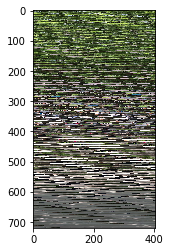

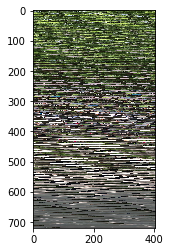

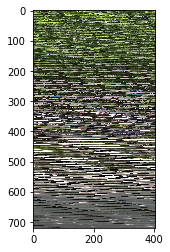

KeyboardInterrupt: ignored

In [99]:
%matplotlib inline
%cd /content/gdrive/My Drive/ai_project/

import cv2
print(cv2.__version__)

#vidcap=cv2.VideoCapture('Sejong_test.mp4')
#success, image = vidcap.read()
#image=cv2.imread("data/KakaoTalk_20190522_201853434_07.jpg")
#img2vid_arr=[]

i=0
#while success:
#    image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#Maximum: 20pics
for image_path in TEST_IMAGE_PATHS:
  with Image.open(image_path) as image:

    # the array based representation of the image will be used later in order to prepare the
    # result image with boxes and labels on it.
    image_np = load_image_into_numpy_array(image)
    #image_np=image
    # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
    image_np_expanded = np.expand_dims(image_np, axis=0)
    # Actual detection.
    output_dict = run_inference_for_single_image(image_np, detection_graph)

    # 감지 결과 json으로 저장
    f=open(os.path.basename(image_path).split('.')[0]+".json", 'w')
    f.write(str(output_dict))
    f.close()
#      f=open(os.path.basename(image_path).split('.')[0]+".json", 'r')
#      print(f)
#      print(f.read())

    # Visualization of the results of a detection.
    vis_util.visualize_boxes_and_labels_on_image_array(
        image_np,
        output_dict['detection_boxes'],
        output_dict['detection_classes'],
        output_dict['detection_scores'],
        category_index,
        instance_masks=output_dict.get('detection_masks'),
        use_normalized_coordinates=True,
        line_thickness=1)
    #plt.imsave('frame'+str(i)+'_test.jpg', image_np); plt.close()
    plt.imsave(os.path.basename(image_path).split('.')[0]+'_test.jpg', image_np); plt.close()
    plt.imshow(image_np); plt.show(); plt.close()
    success, image = vidcap.read()
    '''
    img2vid_arr.append(image_np)
    
    #print(os.path.basename(image_path))
    for _ in range(15):
      success, image = vidcap.read()
    i+=1
    if i%15==0:
      print(str(i//15)+"%")
      plt.imsave('frame'+str(i)+'_test.jpg', image_np)
      plt.imshow(image_np); plt.show(); plt.close()
    if i==1500:
      video=cv2.VideoWriter('test_yongho.avi', -1, 1, (720, 1280))
      for i in img2vid_arr:
        video.write(i)
        
      cv2.destroyAllWindows()
      video.release()
      break
   '''

In [0]:
'''
%cd /content/gdrive/My Drive/ai_project
video=cv2.VideoWriter('test_san.avi', -1, 1, (720, 1280))
for i in img2vid_arr:
  video.write(i)

cv2.destroyAllWindows()
video.release()
'''

/content/gdrive/My Drive/ai_project


In [58]:
!pwd

/content/gdrive/My Drive/ai_project
